<a href="https://colab.research.google.com/github/PhinyadaPhen/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [4]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
import pandas as pd

In [5]:
Name = 'ภิญญาดา เพ็ญสุข'
ID = '6230210522'

In [6]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [7]:
Data = DataGenerator(Name,ID)

021:22:12


In [8]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-8.590591,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407,3.881669,-6.769120,21.408343
1,-1.780529,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802,-8.043338,-8.101059,-38.216691
2,-1.317042,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844,-9.399084,-10.469844,-44.995422
3,-2.890972,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597,0.524378,15.670803,4.621891
4,0.696475,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888,-9.344624,-10.069272,-44.723122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.578964,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820,3.362835,-7.191008,18.814176
9996,-6.233917,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513,3.070636,13.324941,17.353181
9997,9.641212,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021,-0.374443,-10.547509,0.127783
9998,-1.583269,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214,-0.209460,6.782490,0.952698


In [9]:
Data.shape # ดูขนาดของข้อมูล 

(10000, 24)

ทำการตัดข้อมูลที่มีค่า correlation ที่ซ้ำกันออกไป 

In [10]:
corr = np.corrcoef(Data.to_numpy().T)

In [11]:
corr.shape # ดูขนาดของ corr

(24, 24)

In [12]:
corr

array([[ 1.        ,  0.14911094,  0.03266964,  0.18320093,  0.06517606,
         0.43818779, -0.02000149, -0.05451777,  0.23419011, -0.18661214,
        -0.03510231, -0.32496401, -0.08330082,  0.37136865, -0.01996483,
        -0.46460386, -0.32500807, -0.10949574, -0.23140988, -0.28760948,
        -0.37872802, -0.07320836,  0.14911094, -0.07320836],
       [ 0.14911094,  1.        ,  0.19428863,  0.05064928,  0.37842665,
        -0.09678552, -0.68926997,  0.61033302, -0.24541403,  0.14609097,
        -0.39663264, -0.33803924,  0.03679069, -0.07351972,  0.14751492,
        -0.38904241, -0.55174356, -0.0402635 , -0.30709536,  0.07700145,
        -0.16039503,  0.34906782,  1.        ,  0.34906782],
       [ 0.03266964,  0.19428863,  1.        , -0.24966878, -0.24186736,
        -0.50957457, -0.37633118,  0.28202027, -0.50874918,  0.37296143,
        -0.3568447 , -0.11127014, -0.2107758 , -0.06805245,  0.35355515,
        -0.22233773, -0.17689113,  0.4512118 ,  0.22946833, -0.54880941,
  

In [13]:
# วนลูปเพื่อหา correlation ที่มีค่าซ้ำกัน
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

row = 1 column = 22 corrcoef = 1.0
row = 22 column = 1 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


จากการวนลูปจะเห็นว่ามีข้อมูลที่ซ้ำกันจึงต้องตัดข้อมูลออก

In [51]:
DataD = Data.iloc[:,1:21]
DataD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407
1,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802
2,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844
3,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597
4,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820
9996,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513
9997,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021
9998,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214


In [52]:
DataD.shape # ดูขนาดข้อมูลเพื่อตรวจสอบว่าได้ขนาดของข้อมูลที่ต้องการหรือไม่

(10000, 20)

# 1. ทำ Clustering แล้วทำ Visualize ข้อมูลแบบ 2 มิติ

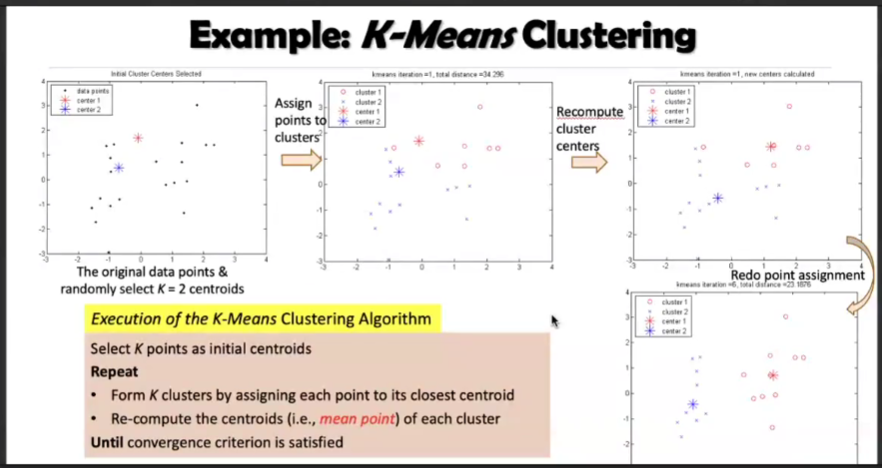

###KMean

1. กำหนดหรือสุ่มค่าเริ่มต้น จำนวน k ค่า (กลุ่ม) และกำหนดจุดศูนย์กลางเริ่มต้น k จุด เรียกว่า cluster centers หรือ centroid

2. นำจุดทั้งหมดจัดเข้ากลุ่ม โดยทำการหาค่าระยะห่างระหว่างข้อมูล กับจุดศูนย์กลาง หากข้อมูลไหนใกล้ค่าจุดศูนย์กลางตัวไหนที่สุด ก็จะอยู่กลุ่มนั้น

3. หาค่าเฉลี่ย แต่ละกลุ่มให้เป็นค่าจุดศูนย์กลางใหม่

4. ทำซ้ำข้อ 2 จนกระทั่งค่าเฉลี่ยจุดศูนย์กลางในแต่ละกลุ่มจะไม่เปลี่ยนแปลง จึงหยุดทำ

import

In [53]:
from sklearn.cluster import KMeans # import function ที่ใช้ในการทำ KMean 

Define

In [54]:
kmeans = KMeans(n_clusters=3, random_state=2021)  
# จะกำหนดหรือไม่ต้อง set ค่า k ก็ได้ เพราะค่า k มีค่า default
# random_state กำหนดเพื่อให้เริ่มสุ่มที่จุดเดียวกัน

Fit-transform

* คำนวณหาจุด cluster center ของข้อมูล Data ด้วยวิธี K-Means clustering

In [55]:
kmeans.fit(DataD)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

* แสดงจุด cluster center ที่คำนวณออกมาได้

In [56]:
kmeans.cluster_centers_

array([[ 2.30264625,  4.25944788,  0.72004909,  1.99982086, -0.39159073,
        -2.39860459,  1.08561407, -2.75657374,  3.93557383, -3.81806378,
         1.75751693,  0.34283146, -1.38048187,  3.83425265, -3.43212583,
         4.72303427,  5.11814545,  1.01574098, -2.36651761,  4.33769618],
       [ 1.46642859,  0.43040026,  1.254225  , -4.77315191, -3.15532469,
         3.71308603, -3.45332961, -2.37778521, -8.86251051, -1.0469078 ,
        -1.55090324,  4.77406335, -3.24631801, -2.84821644, -6.61669384,
        -0.66485772, -0.58956472, -0.81494927,  0.71474858, -5.12721484],
       [-3.95323239, -5.70578064,  1.64661344,  0.02905358,  7.03451045,
         6.54295974, -9.62818814,  1.15048996, -6.85166428,  7.69973583,
         2.61838155,  3.61596528,  0.15204351,  5.11166357,  6.12843708,
         8.9717753 , -9.50722931,  2.06210904, -1.1181517 ,  7.3197396 ]])

* ทดสอบการจัดกลุ่มของข้อมูล

In [57]:
a = kmeans.predict(DataD)
a

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

### Visualize 

*  PCA เพื่อลด Dimension 

In [58]:
from sklearn.decomposition import PCA # import function ที่ใช้ในการทำ PCA

pca = PCA(n_components = 2) # กำหนด Dimension = 2

new_pca = pca.fit_transform(DataD)

from matplotlib import pyplot as plt # import เพื่อใช้ในการ plot กราฟ

In [59]:
import matplotlib # เพื่อใช้ในการขยายกราฟให้ใหญ่ขึ้น

In [76]:
matplotlib.rcParams['figure.figsize']=[20,20] # ขยายตารางให้ดูการกระจายข้อมูลในกราฟได้ชัดขึ้น เนื่องจากมีการกระจายข้อมูลซ้อนทับกันมาก

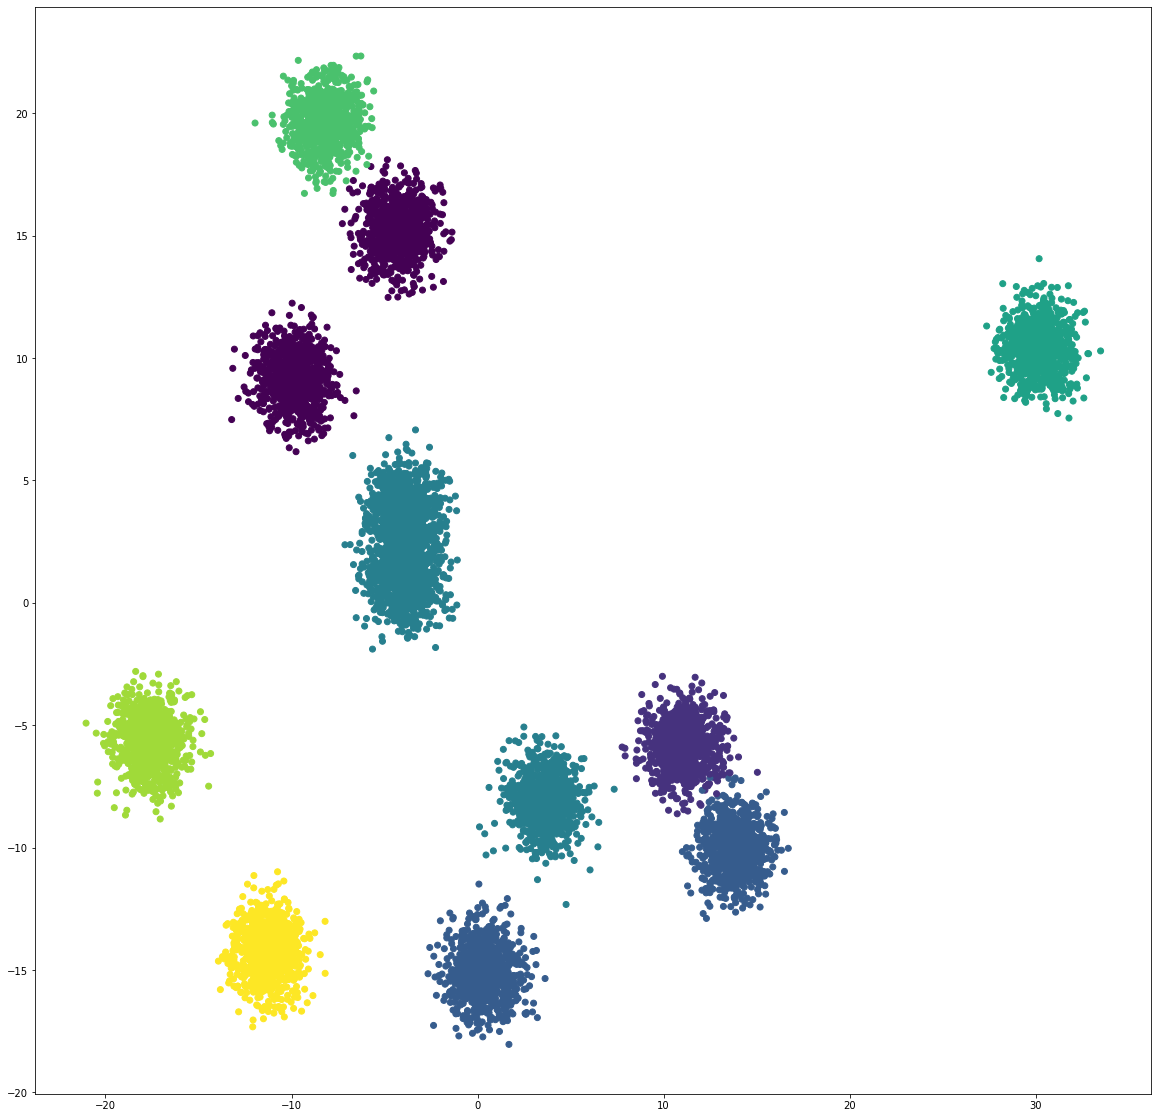

In [61]:
kmeans = KMeans(random_state=2021) # ไม่ได้กำหนดค่า k 
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)

จากกราฟจะเห็นได้ว่ามีการจัดกลุ่มข้อมูล วิเคราะห์จากสีที่ใช้แตกต่างกัน ซึ่งมี 8 กลุ่ม ดังนั้นเราจะทำการจัดกลุ่มข้อมูลใหม่ หรือ หาค่า k ที่เหมาะสมกับข้อมูล

### หาค่า k จากวิธี The elbow method

SSE = Sum of squared Error 
คำนวณหาค่า SSE ของข้อมูล

In [62]:
kmeans.inertia_ 

1435830.5083828224

In [63]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(DataD)
  SSE.append(kmeans.inertia_)

In [64]:
SSE # แสดงผลลัพธ์ค่า SSE

[6628851.372509228,
 5359241.357034274,
 4354382.630727116,
 3684781.4001719765,
 3051808.8123300066,
 2451569.77276959,
 1930770.8996569193,
 1435830.5083828224]

Text(0, 0.5, 'SSE')

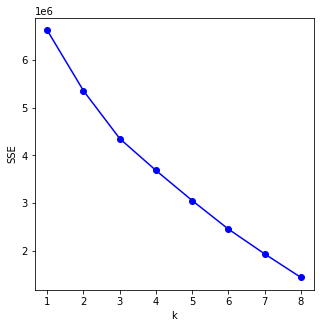

In [65]:
# นำค่า SSE ที่ได้ มา plot กราฟเพื่อดูว่ามี k กี่กลุ่ม
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE')

จากกราฟจะเห็นได้ว่ามี k ทั้งหมด 2 กลุ่ม โดยระยะห่างระหว่างจุดที่ 1 จะมีระยะห่างระหว่างจุดใกล้กันกับจุดที่ 2 และระยะห่างระหว่างจุดที่ 3 จะใกล้กันกับจุดที่ 4, 5, 6, 7, 8
ดังนั้นค่า k ที่เหมาะสมคือ 2 กลุ่ม

Text(0, 0.5, 'Y')

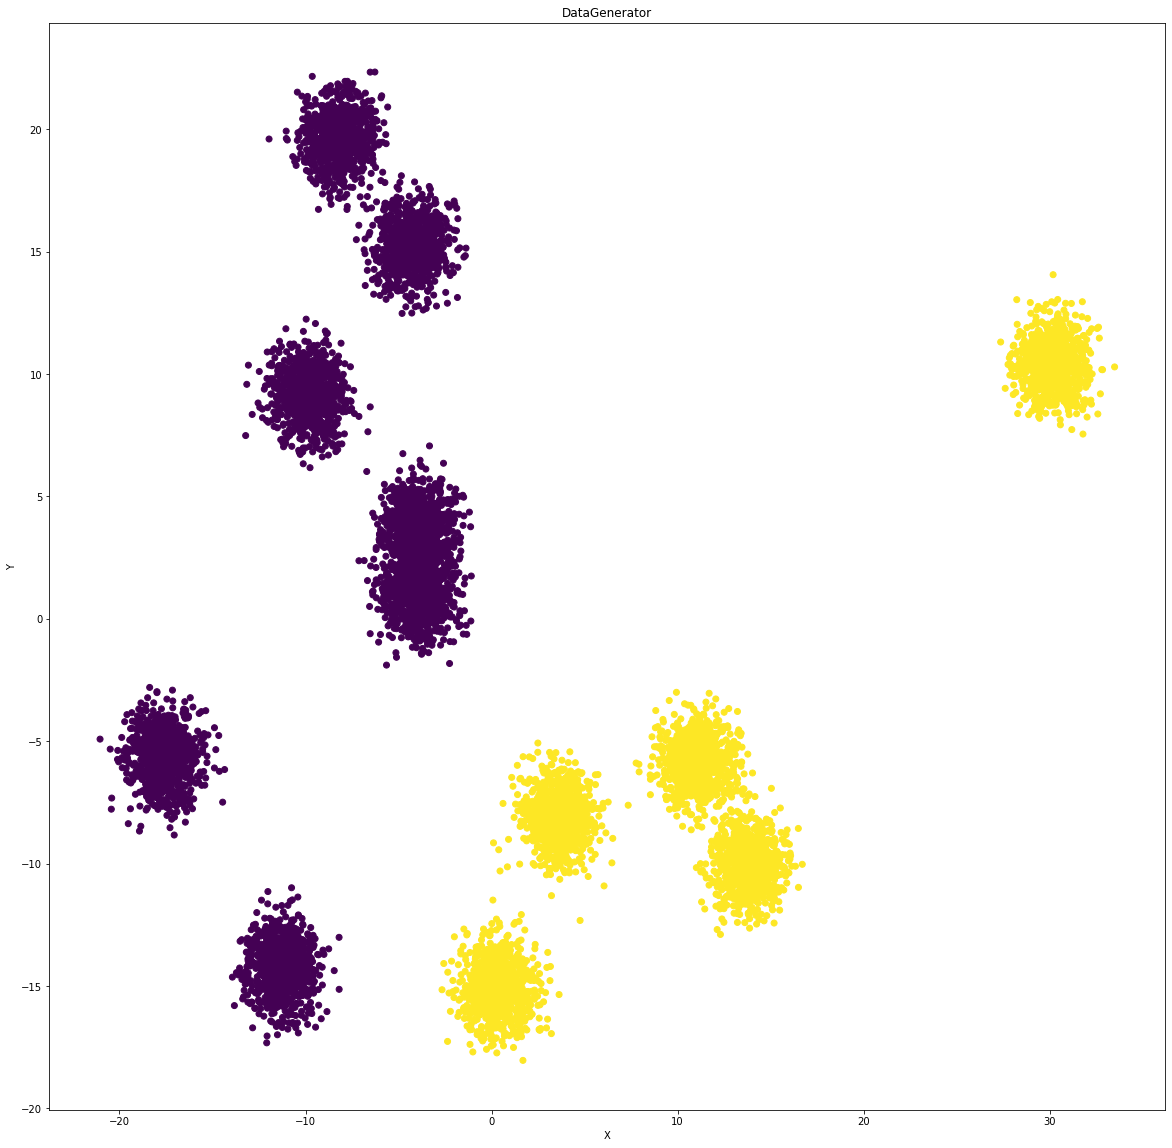

In [71]:
kmeans = KMeans(n_clusters=2,random_state=2021) # กำหนด k = 2 
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

### หาค่า k จากวิธี Silhouette coefficient (ค่าสัมประสิทธิ์ภาพเงา)


*  How close the data point is to other points in the cluster (จุดข้อมูลอยู่ใกล้กับจุดอื่น ๆ ในคลัสเตอร์มากเพียงใด)
*   How far away the data point is from points in other clusterss (จุดข้อมูลอยู่ห่างจากจุดในคลัสเตอร์อื่นมากเพียงใด)



In [72]:
from sklearn import metrics 

In [73]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(DataD)
  score = metrics.silhouette_score(Data,kmeans.labels_)
  SilH.append(score)

Text(0, 0.5, 'SilH')

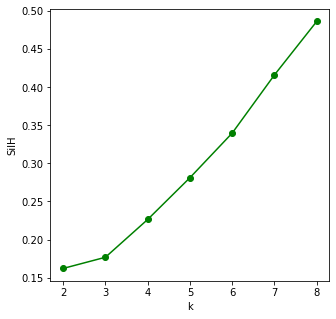

In [74]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH')

จากกราฟจะเห็นได้ว่ามี k ทั้งหมด 3 กลุ่ม โดยมีระยะห่างระหว่างจุดที่แตกต่างกันทั้งหมด 3 ช่วง คือ 2, 3, 6

Text(0, 0.5, 'Y')

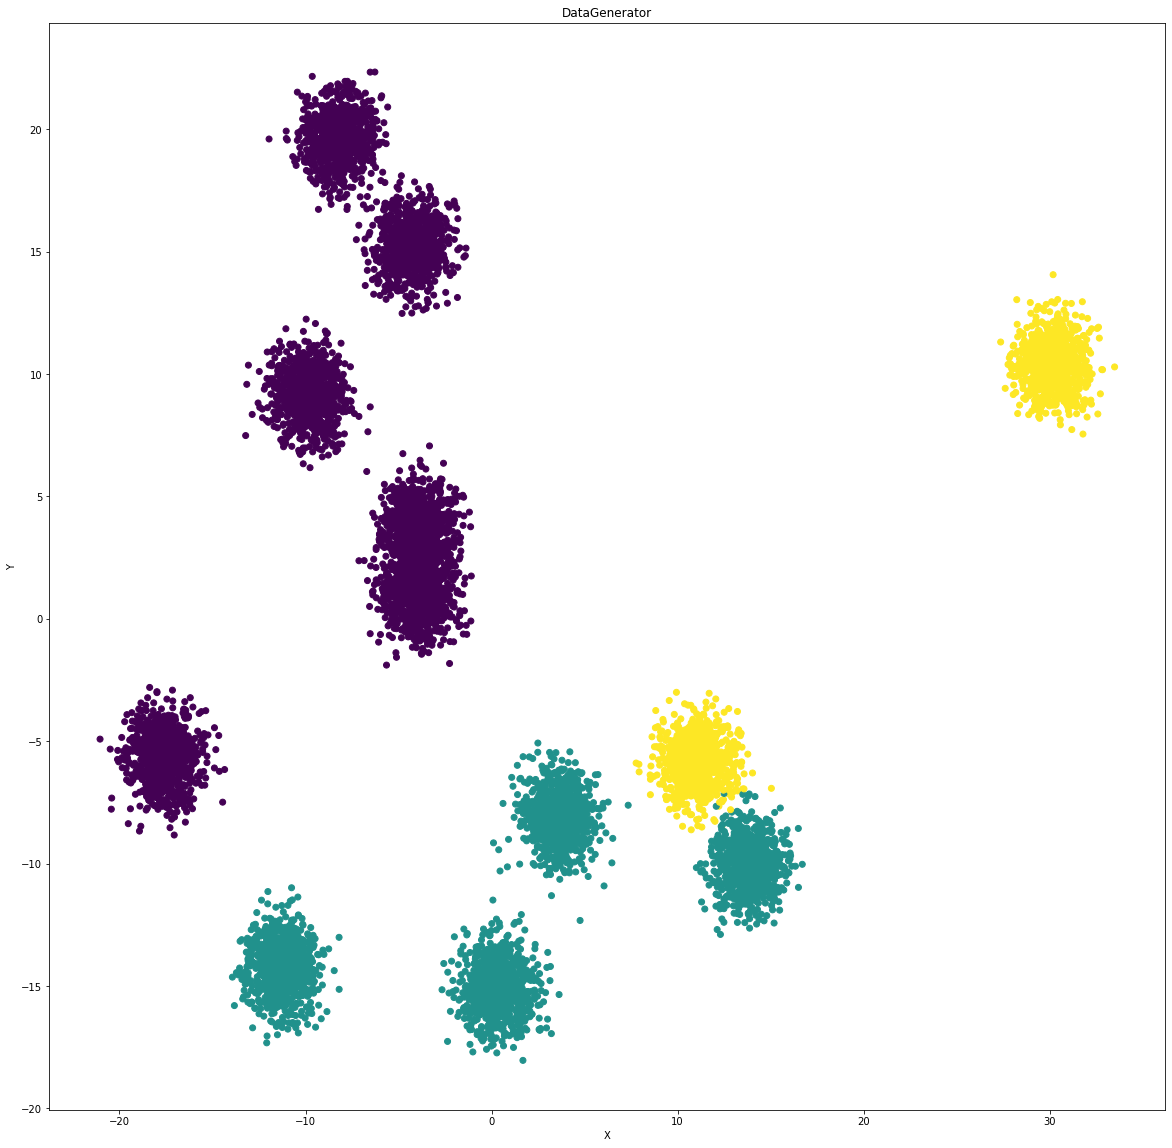

In [77]:
kmeans = KMeans(n_clusters=3,random_state=2021) # กำหนด k = 3 
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

จากกราฟจะเห็นได้ว่าเมื่อกำหนดค่า k = 3 แล้วยังมีข้อมูลที่มีการซ้อนทับกันเป็นจำนวนมาก เนื่องจากข้อมูลมีปริมาณที่มาก

# 2. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

* MDS 

In [78]:
from sklearn.manifold import MDS # import function ที่ใช้ในการทำ MDS

In [79]:
mds = MDS(n_components=2)

In [80]:
new_mds = mds.fit_transform(DataD)

Text(0, 0.5, 'Y')

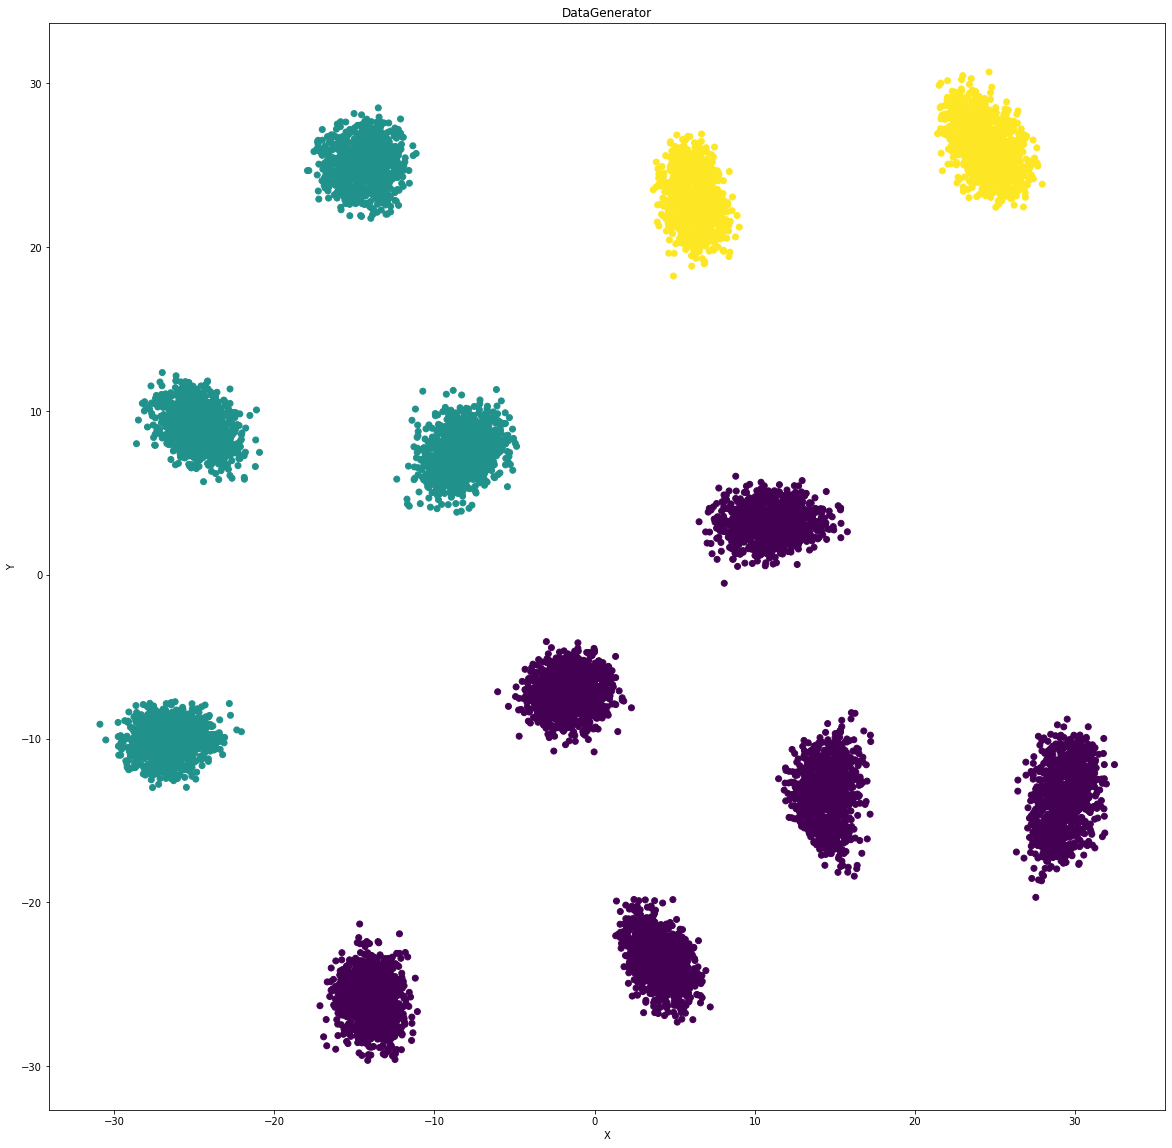

In [81]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(DataD)
b = kmeans2.predict(DataD)
plt.scatter(new_mds[:,0],new_mds[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

# 3. เปรียบเทียบความแตกต่างระหว่าง 1 กับ 2

Text(0, 0.5, 'Y')

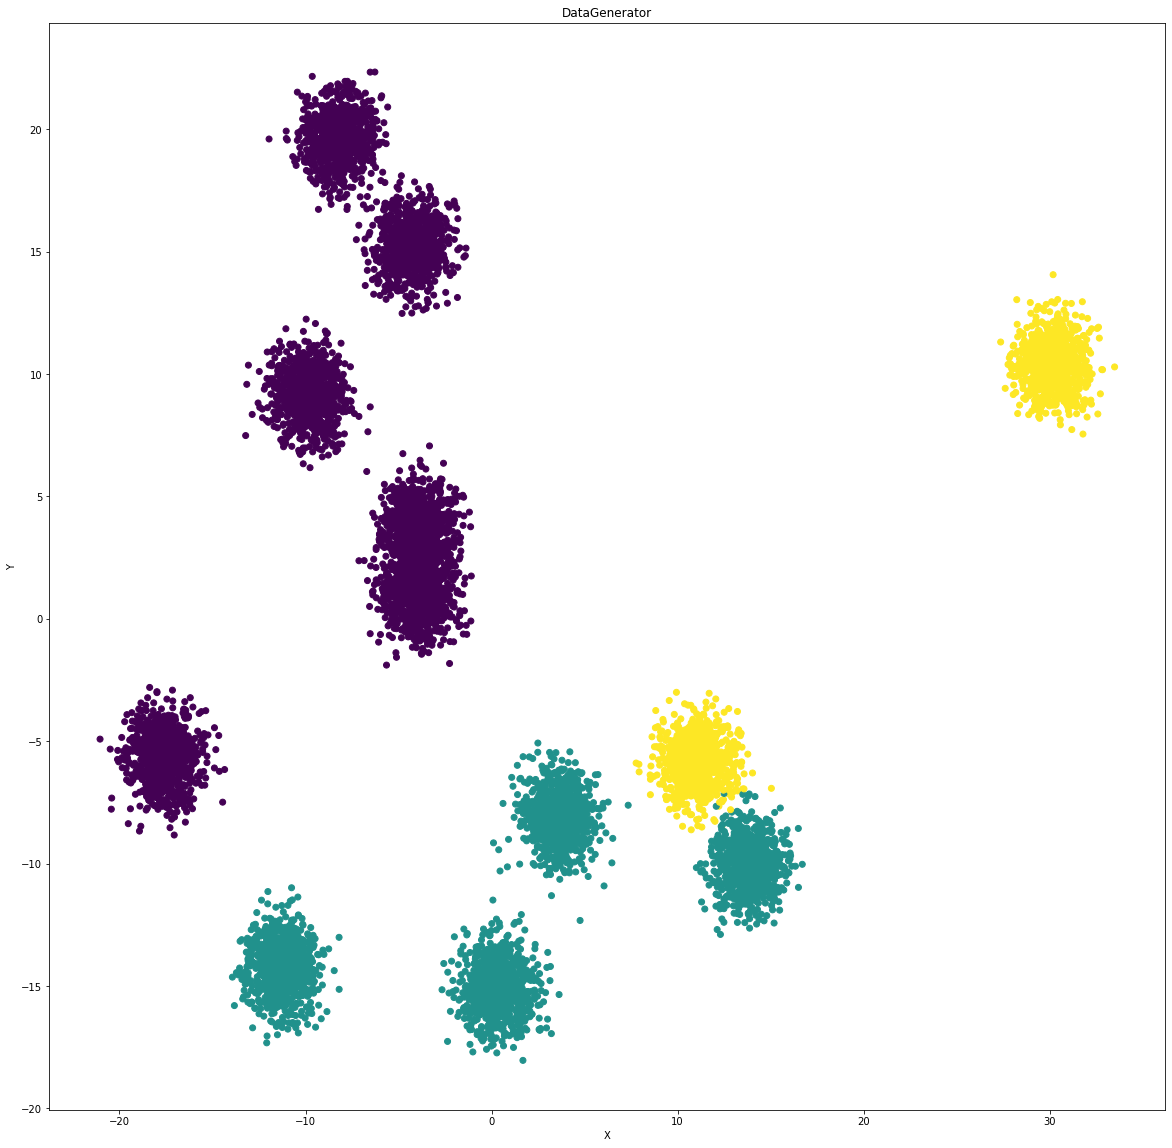

In [82]:
kmeans = KMeans(n_clusters=3,random_state=2021) # กำหนด k = 3 
kmeans.fit(DataD)
a = kmeans.predict(DataD)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

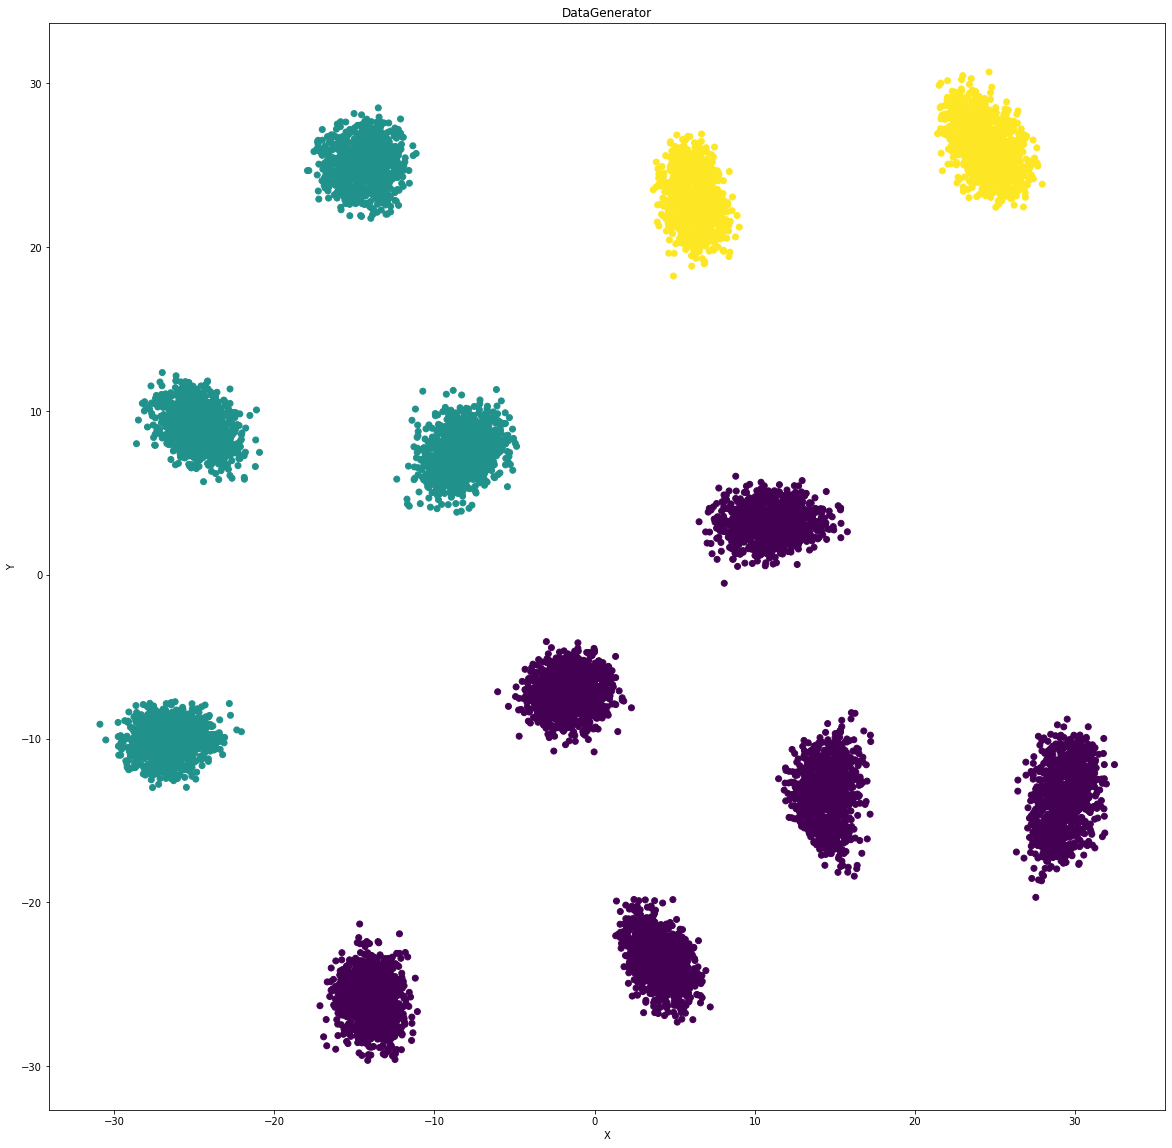

In [83]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(DataD)
b = kmeans2.predict(DataD)
plt.scatter(new_mds[:,0],new_mds[:,1], c=a)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')